# 7.1.2 Feedforward Neural Network

## Explanation of Feedforward Neural Networks

A **Feedforward Neural Network (FNN)**, also known as a **Multi-Layer Perceptron (MLP)**, is a type of artificial neural network where the connections between the nodes do not form a cycle. It is the simplest form of artificial neural network used for both classification and regression tasks. An FNN consists of an input layer, one or more hidden layers, and an output layer. Each layer is fully connected to the next layer.

The operation of an FNN can be described in the following steps:

1. **Input Layer**: Receives the input data.
2. **Hidden Layers**: Perform computations and transfer the results to the next layer. Each neuron in a hidden layer applies a non-linear activation function to the weighted sum of its inputs.
3. **Output Layer**: Produces the final prediction.

The mathematical representation of an FNN is:

$$
y = f(W_k f(W_{k-1} ... f(W_2 f(W_1 x + b_1) + b_2) ... + b_{k-1}) + b_k)
$$

where $ x $ is the input vector, $ W^i $ and $ b^i $ are the weights and biases of the $ i $-th layer, and $ f $ is the activation function.

Common activation functions include:

- **Sigmoid**: $ \sigma(x) = \frac{1}{1 + e^{-x}} $
- **ReLU (Rectified Linear Unit)**: $ \text{ReLU}(x) = \max(0, x) $
- **Tanh**: $ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

### Forward Propagation

In forward propagation, the input data passes through each layer of the network. The operations performed at each layer can be described as:

$$
Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}
$$

$$
A^{[l]} = g(Z^{[l]})
$$

Where:
- $ Z^{[l]} $ is the linear transformation of the input at layer $ l $.
- $ W^{[l]} $ is the weight matrix for layer $ l $.
- $ A^{[l-1]} $ is the activation from the previous layer.
- $ b^{[l]} $ is the bias vector for layer $ l $.
- $ g $ is the activation function (e.g., ReLU, Sigmoid).

### Backward Propagation

Backward propagation involves calculating the gradient of the loss function with respect to each parameter in the network. This process uses the chain rule of calculus to efficiently compute the gradients.

## Benefits and Use Cases of Feedforward Neural Networks

**Benefits**:
- Ability to model complex relationships in data.
- Flexibility to handle both regression and classification tasks.
- Capability to approximate any continuous function given sufficient hidden layers and neurons.

**Use Cases**:
- Image and speech recognition.
- Natural language processing.
- Financial prediction and fraud detection.
- Medical diagnosis.


___
___
### Readings:
- [Multi-Layer Perceptron vs. Deep Neural Network](https://www.baeldung.com/cs/mlp-vs-dnn)
- [Multilayer Perceptron Explained with a Real-Life Example and Python Code: Sentiment Analysis](https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141)
- [Deep Neural Network, Multilayer Perceptron, and Deep Q-Network](https://www.turing.com/kb/explanation-of-deep-neural-network-multilayer-perceptron-deep-q-network#multilayer-perceptron)
- [The Multilayer Perceptron](https://com-cog-book.github.io/com-cog-book/features/multilayer-perceptron.html)
- [Crash Course on Multi-Layer Perceptron Neural Networks](https://machinelearningmastery.com/neural-networks-crash-course/)

___
___

### Implementation from Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
class MLP:
    def __init__(self, layers, learning_rate=0.01, epochs=1000):
        self.layers = layers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.params = self.initialize_weights()

    def initialize_weights(self):
        np.random.seed(42)
        params = {}
        for i in range(1, len(self.layers)):
            params['W' + str(i)] = np.random.randn(self.layers[i-1], self.layers[i]) * 0.01
            params['b' + str(i)] = np.zeros((1, self.layers[i]))
        return params

    def relu(self, Z):
        return np.maximum(0, Z)

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def relu_derivative(self, Z):
        return Z > 0

    def sigmoid_derivative(self, Z):
        return Z * (1 - Z)

    def forward_propagation(self, X):
        cache = {'A0': X}
        A = X
        for i in range(1, len(self.layers)):
            Z = np.dot(A, self.params['W' + str(i)]) + self.params['b' + str(i)]
            A = self.relu(Z) if i < len(self.layers) - 1 else self.sigmoid(Z)
            cache['Z' + str(i)] = Z
            cache['A' + str(i)] = A
        return cache

    def backward_propagation(self, cache, Y):
        grads = {}
        L = len(self.layers) - 1
        m = Y.shape[0]
        Y = Y.reshape(cache['A' + str(L)].shape)
        dA = -(np.divide(Y, cache['A' + str(L)]) - np.divide(1 - Y, 1 - cache['A' + str(L)]))

        for i in reversed(range(1, L + 1)):
            dZ = dA * (self.sigmoid_derivative(cache['A' + str(i)]) if i == L else self.relu_derivative(cache['Z' + str(i)]))
            grads['dW' + str(i)] = np.dot(cache['A' + str(i-1)].T, dZ) / m
            grads['db' + str(i)] = np.sum(dZ, axis=0, keepdims=True) / m
            dA = np.dot(dZ, self.params['W' + str(i)].T)
        return grads

    def update_parameters(self, grads):
        for i in range(1, len(self.layers)):
            self.params['W' + str(i)] -= self.learning_rate * grads['dW' + str(i)]
            self.params['b' + str(i)] -= self.learning_rate * grads['db' + str(i)]

    def compute_cost(self, A, Y):
        m = Y.shape[0]
        cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
        return np.squeeze(cost)

    def fit(self, X, Y):
        for epoch in range(self.epochs):
            cache = self.forward_propagation(X)
            grads = self.backward_propagation(cache, Y)
            self.update_parameters(grads)

            if epoch % 100 == 0:
                cost = self.compute_cost(cache['A' + str(len(self.layers) - 1)], Y)
                print(f'Epoch {epoch}, Cost: {cost}')

    def predict(self, X):
        cache = self.forward_propagation(X)
        predictions = cache['A' + str(len(self.layers) - 1)]
        return predictions > 0.5

In [3]:
# Load the dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification: Iris-setosa vs. others

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Initialize and train the Feedforward Neural Network
mlp = MLP(layers=[4, 10, 10, 1], learning_rate=0.05, epochs=2000)
mlp.fit(X_train, y_train)

Epoch 0, Cost: 83.17769487644863
Epoch 100, Cost: 76.99957179186768
Epoch 200, Cost: 76.44388786824612
Epoch 300, Cost: 76.38821046567644
Epoch 400, Cost: 76.38239004992782
Epoch 500, Cost: 76.38177328265793
Epoch 600, Cost: 76.38170783485094
Epoch 700, Cost: 76.3817009613846
Epoch 800, Cost: 76.38170027784984
Epoch 900, Cost: 76.38170023959353
Epoch 1000, Cost: 76.38170027877173
Epoch 1100, Cost: 76.38170036283559
Epoch 1200, Cost: 76.38170055007706
Epoch 1300, Cost: 76.38170102801729
Epoch 1400, Cost: 76.38170246566318
Epoch 1500, Cost: 76.38170784811456
Epoch 1600, Cost: 76.38173457808126
Epoch 1700, Cost: 76.38193015094762
Epoch 1800, Cost: 76.3846441665528
Epoch 1900, Cost: 76.51952896293184


In [6]:
# Evaluate the model
train_predictions = mlp.predict(X_train)
test_predictions = mlp.predict(X_test)
train_accuracy = np.mean(train_predictions == y_train.reshape(-1, 1))
test_accuracy = np.mean(test_predictions == y_test.reshape(-1, 1))

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 1.00


In [7]:
# Plot the decision boundary using PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [8]:
def plot_decision_boundary(X, y, model, pca):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(scaler.transform(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])))
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Decision Boundary')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

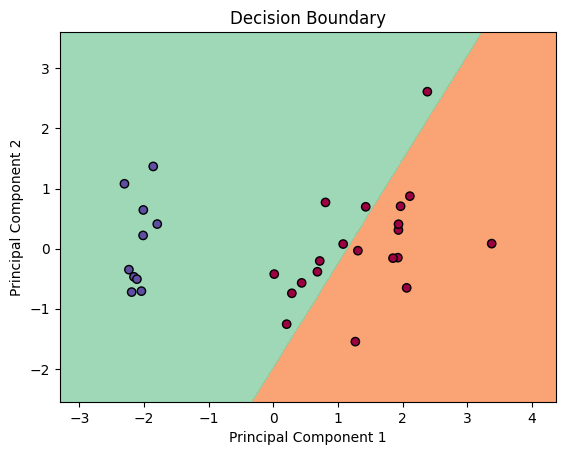

In [9]:
plot_decision_boundary(X_test_pca, y_test, mlp, pca)

___
___
### Using `sklearn.neural_network`

#### MLP Classifier

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

In [11]:
# Load the dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification: Iris-setosa vs. others

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Initialize and train the Feedforward Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=2000, learning_rate_init=0.05, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model
train_predictions = mlp.predict(X_train)
test_predictions = mlp.predict(X_test)
train_accuracy = np.mean(train_predictions == y_train)
test_accuracy = np.mean(test_predictions == y_test)

In [15]:
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 1.00


In [16]:
# Plot the decision boundary using PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [17]:
def plot_decision_boundary(X, y, model, pca):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(scaler.inverse_transform(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])))
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Decision Boundary')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

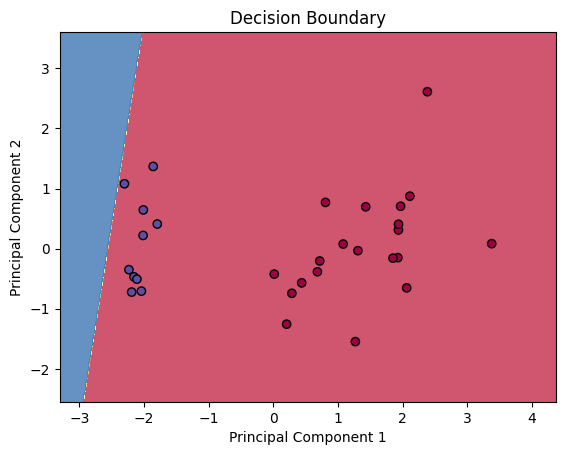

In [18]:
plot_decision_boundary(X_test_pca, y_test, mlp, pca)

#### MLP Regressor

In [19]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Generate synthetic data
x = np.ones((1, 40)) * np.linspace(0, 1, 40)
t = np.sin(2 * np.pi * x) + np.cos(4 * np.pi * x) + np.random.randn(40) * 0.2
x = x.T
t = t.T

In [21]:
# Split the data into training, testing, and validation sets
train = x[0::2, :]
test = x[1::4, :]
valid = x[3::4, :]
traintarget = t[0::2, :]
testtarget = t[1::4, :]
validtarget = t[3::4, :]

In [22]:
# Create an MLPRegressor instance
regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

In [23]:
# Flatten the target variables to 1-dimensional arrays
traintarget_flat = traintarget.ravel()
testtarget_flat = testtarget.ravel()

In [24]:
# Train the regressor using the training data
regressor.fit(train, traintarget_flat)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [25]:
# Predict on the test set
predictions = regressor.predict(test)

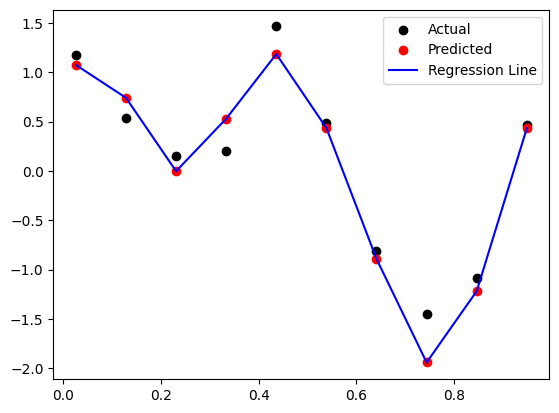

In [26]:
# Plot the results
plt.scatter(test, testtarget_flat, color='black', label='Actual')
plt.scatter(test, predictions, color='red', label='Predicted')

# Sort the test data for plotting the regression line
sorted_indices = np.argsort(test.flatten())
sorted_test = test.flatten()[sorted_indices]
sorted_predictions = predictions[sorted_indices]

# Plot the regression line
plt.plot(sorted_test, sorted_predictions, color='blue', label='Regression Line')

plt.legend()
plt.show()

### Conclusion

In this section, we explored the implementation of a Feedforward Neural Network (FNN) from scratch and applied it to the Iris dataset for binary classification. The Iris dataset, which is a classic example in machine learning, contains features that are suitable for classification tasks. We used the FNN to classify the Iris data into two classes based on selected features.

The process included initializing the network with appropriate layers, training it using backpropagation, and updating the weights to minimize the cost function. After training, the model's performance was evaluated, and the decision boundaries were visualized to understand how the network separates different classes.

Despite its simplicity, the FNN demonstrated its capability to effectively classify the Iris dataset into two classes, showcasing its utility in solving real-world binary classification problems. This implementation highlights the importance of neural networks in handling complex datasets and forming the basis for more advanced architectures in deep learning.
